In [3]:
import pickle
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset as a dataframe
url = "./troop_movements.csv"
df = pd.read_csv(url)

In [4]:
# group data by the "empire_or_resistance" column
grouped_data = df.groupby('empire_or_resistance')

# count the number of instances in each category
counts = grouped_data.size()

# display counts
print("Counts of Empire vs Resistance:")
print(counts)

Counts of Empire vs Resistance:
empire_or_resistance
empire        510
resistance    490
dtype: int64


In [8]:
# group data by the "home_world" column
homeworld_counts = data.groupby('homeworld').size()

# display the counts for characters by homeworld
print("Counts of Characters by Homeworld:")
print(homeworld_counts)

Counts of Characters by Homeworld:
homeworld
Alderaan        238792
Aleen Minor     237711
Bestine IV      237750
Cerea           238600
Champala        238268
Chandrila       237947
Concord Dawn    237416
Corellia        239249
Dagobah         238207
Dathomir        238008
Dorin           238053
Eriadu          237116
Glee Anselm     238081
Haruun Kal      238261
Iktotch         238525
Iridonia        236890
Kalee           238584
Kashyyyk        238360
Malastare       237656
Mirial          238197
Mon Cala        238398
Muunilinst      238615
Naboo           238709
Ojom            238114
Quermia         237405
Rodia           238126
Ryloth          237928
Serenno         237223
Shili           238399
Skako           238093
Socorro         237822
Stewjon         238341
Sullust         238685
Tatooine        238722
Tholoth         237660
Toydaria        237526
Trandosha       237880
Troiken         237716
Tund            238406
Umbara          238799
Vulpter         237742
Zolan       

In [9]:
# group data by the "unit_type" column
unit_type_counts = data.groupby('unit_type').size()

# display the counts for characters by unit type
print("\nCounts of Characters by Unit Type:")
print(unit_type_counts)


Counts of Characters by Unit Type:
unit_type
at-at                 1426525
at-st                 1426173
invalid_unit            10000
resistance_soldier    1425774
stormtrooper          1428291
tie_fighter           1426809
tie_silencer          1428016
x-wing                1428412
dtype: int64


In [11]:
# create a new feature with boolean values based on resistance or empire affiliation
# returns True if the character belongs to the resistance and false otherwise
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'

# display for testing
print(df.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-05-21 11:36:26        1  tie_silencer               empire   
1  2024-05-21 11:36:25        2        x-wing               empire   
2  2024-05-21 11:36:24        3        x-wing               empire   
3  2024-05-21 11:36:23        4        x-wing           resistance   
4  2024-05-21 11:36:22        5       unknown           resistance   

   location_x  location_y  destination_x  destination_y   homeworld  \
0           6           5              3              3        Tund   
1           7           5              5              1  Haruun Kal   
2           2           3              9              6     Troiken   
3           2           2              9              2    Alderaan   
4           9          10              6              9    Toydaria   

   is_resistance  
0          False  
1          False  
2          False  
3           True  
4           True  


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_9840\3972954026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='empire_or_resistance', data=df, palette='Set1')


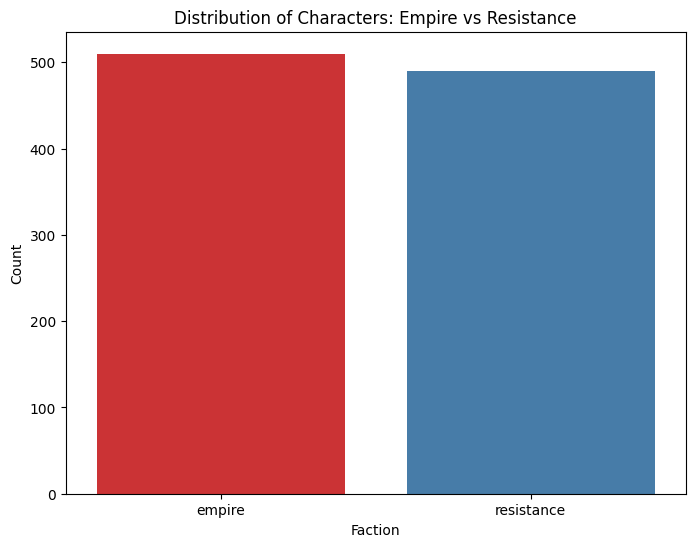

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# creates a bar plot of
plt.figure(figsize=(8, 6))
sns.countplot(x='empire_or_resistance', data=df, palette='Set1')
plt.title('Distribution of Characters: Empire vs Resistance')
plt.xlabel('Faction')
plt.ylabel('Count')
plt.show()

In [13]:
# features (homeworld and unit_type)
X = df[['homeworld', 'unit_type']]

# target variable (empire_or_resistance)
y = df['empire_or_resistance']

# convert categorical variables into numerical representation
X = pd.get_dummies(X)

# split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.535


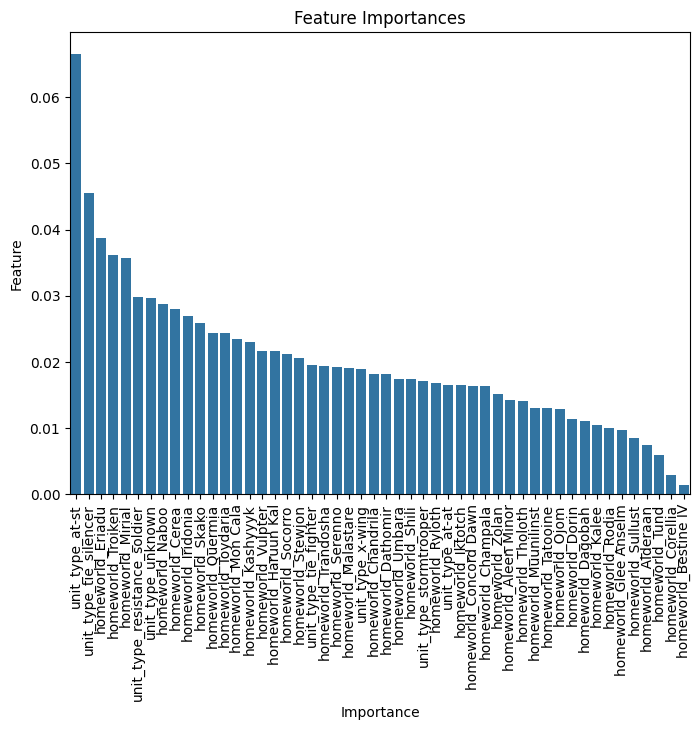

In [17]:
importances = clf.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Plotting feature importances
plt.figure(figsize=(8, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importances.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()